In [1]:
import numpy as np
import os, sys
import h5py
import pandas as pd
import matplotlib.pyplot as plt

import datetime as DT
import matplotlib.dates as mdates

#sys.path.append('/Users/ajc/research/PreProcessing/python-scripts')
#sys.path.append('/Users/ajc/Core/PostProcessData/PyScript')
#sys.path.append('/Users/ajc/research/PreProcessing/python-scripts/ats-tools')
#print (sys.path)
sys.path.remove(sys.path[0])
#print (sys.path)
sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils/')

#import readdata as rd
import plot_water_table2D
#sys.path.append(os.getcwd())

import importlib as imp
#print (plot_water_table2D.__file__)

In [2]:
import re
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

In [3]:
path = "/Users/ajc/FUSE2/simulations/barrow_icewedges/hydrologic_connection/ProjectionsE/"

In [ ]:
simulation = 'CESM_C3A'
Time, WaterLevelCenter, ThawDepthC, Z_c = plot_water_table2D.water_table2D(path + '%s/'%simulation)#,x_pos= 36)
#Time, WaterLevelTrough, ThawDepthT, Z_t = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')#,x_pos=75)

simulation = 'CESM_C4A'
Time21, WaterLevelCenter21, ThawDepthC21, Z_c21 = plot_water_table2D.water_table2D(path + '%s/'%simulation)#,x_pos= 36)
#Time, WaterLevelTrough, ThawDepthT, Z_t = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')#,x_pos=75)

In [ ]:
simulation = 'CESM_C3A'
Time, WaterLevelTrough, ThawDepthT, Z_t = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')
simulation = 'CESM_C4A'
Time21, WaterLevelTrough21, ThawDepthT21, Z_t21 = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')#,x_pos=75)

In [13]:
simulation = 'test1'
Time, WaterLevelCenter, ThawDepthC, Z_c = plot_water_table2D.water_table2D(path + '%s/'%simulation)#,x_pos= 36)
Time21, WaterLevelCenter21, ThawDepthC21, Z_c21 = plot_water_table2D.water_table2D(path + '%s/'%simulation)#,x_pos= 36)
#Time, WaterLevelTrough, ThawDepthT, Z_t = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')#,x_pos=75)
#simulation = 'test1'
#Time211, WaterLevelTrough211, ThawDepthT211, Z_t211 = plot_water_table2D.water_table2D(path + '%s/'%simulation, location='trough')#,x_pos=75)

<HDF5 file "visdump_surface_data.h5" (mode r)>
Location:  center 45
Datum (surface elevation) [4.78019973]
Mesh type:  HEX
4 61 45 85
<HDF5 file "visdump_surface_data.h5" (mode r)>
Location:  center 45
Datum (surface elevation) [4.78019973]
Mesh type:  HEX
4 61 45 85


In [14]:
print (Time[0], Time[-1])
print (Time21[0], Time21[-1])
print (len(ThawDepthC))

0.0013689253935660506 0.8227241615331964
0.0013689253935660506 0.8227241615331964
61


In [15]:
center = True
trough = False

In [16]:
if (center):
    DataSim =dict()
    time = [t*365.25 for t in Time]

    DataSim['time'] = time
    print ('1:',len(ThawDepthC), len(WaterLevelCenter))
    
    DataSim['WL_center'] = WaterLevelCenter
    DataSim['TD_center'] = [t + Z_c for t in ThawDepthC]

    Data_C = []
    Time_C = []

    for i,d in enumerate(DataSim['WL_center']):
        Data_C.append(d + Z_c)
        Time_C.append(DataSim['time'][i])
    DataSim['water_level_center'] = np.concatenate(Data_C)
    DataSim['time_center'] = np.array(Time_C)
    DataSim['thaw_depth_center'] = np.array(DataSim['TD_center'])
    print ('2:',len(DataSim['thaw_depth_center']), len(DataSim['water_level_center']), len(DataSim['time_center']))


    #-----------------------------------------------------------

    DataSim21 =dict()
    time = [t*365.25 for t in Time21]
    DataSim21['time'] = time
    
    DataSim21['WL_center'] = WaterLevelCenter21
    DataSim21['TD_center'] = [t + Z_c for t in ThawDepthC21]

    Data_C = []
    Time_C = []

    for i,d in enumerate(DataSim21['WL_center']):
        Data_C.append(d + Z_c)
        Time_C.append(DataSim21['time'][i])

    DataSim21['water_level_center'] = np.concatenate(Data_C)
    DataSim21['time_center'] = np.array(Time_C)
    DataSim21['thaw_depth_center'] = np.array(DataSim21['TD_center'])
    print ('2:',len(DataSim21['thaw_depth_center']), len(DataSim21['water_level_center']), len(DataSim21['time_center']))
    print (DataSim.keys())

1: 61 61
2: 61 61 61
2: 61 61 61
dict_keys(['time', 'WL_center', 'TD_center', 'water_level_center', 'time_center', 'thaw_depth_center'])


In [17]:
if (trough):
    DataSim =dict()
    time = [t*365.25 for t in Time]

    DataSim['time'] = time
    print ('1:',len(ThawDepthC), len(WaterLevelCenter))
    
    DataSim['WL_trough'] = WaterLevelCenter
    DataSim['TD_trough'] = [t + Z_c for t in ThawDepthC]

    Data_C = []
    Time_C = []

    for i,d in enumerate(DataSim['WL_trough']):
        Data_C.append(d + Z_c)
        Time_C.append(DataSim['time'][i])
    

    DataSim['water_level_trough'] = np.concatenate(Data_C)
    DataSim['time_trough'] = np.array(Time_C)
    DataSim['thaw_depth_trough'] = np.concatenate(DataSim['TD_trough'])
    print ('1:',len(DataSim['thaw_depth_trough']), len(DataSim['water_level_trough']), len(DataSim['time_trough']))
    
    #-----------------------------------------------------------

    DataSim21 =dict()
    time = [t*365.25 for t in Time21]
    DataSim21['time'] = time
    
    DataSim21['WL_trough'] = WaterLevelCenter21
    DataSim21['TD_trough'] = [t + Z_c for t in ThawDepthC21]

    Data_C = []
    Time_C = []

    for i,d in enumerate(DataSim21['WL_trough']):
        Data_C.append(d + Z_c)
        Time_C.append(DataSim21['time'][i])

    DataSim21['water_level_trough'] = np.concatenate(Data_C)
    DataSim21['time_trough'] = np.array(Time_C)
    DataSim21['thaw_depth_trough'] = np.concatenate(DataSim21['TD_trough'])
    print ('2:',len(DataSim21['thaw_depth_trough']), len(DataSim21['water_level_trough']), len(DataSim21['time_trough']))

In [18]:
if center == True:
    l = len(DataSim['TD_center'])%365
    DataSim['TD_center_yr'] = np.reshape(DataSim['TD_center'][:-l],(-1,365)).min(axis=1)
    l = len(DataSim21['TD_center'])%365
    DataSim21['TD_center_yr'] = np.reshape(DataSim21['TD_center'][:-l],(-1,365)).min(axis=1)

#l = len(DataSim['TD_trough'])%365
#DataSim['TD_trough_yr'] = np.reshape(DataSim['TD_trough'][:-l],(-1,365)).min(axis=1)
#l = len(DataSim21['TD_trough'])%365
#DataSim21['TD_trough_yr'] = np.reshape(DataSim21['TD_trough'][:-l],(-1,365)).min(axis=1)

In [19]:
if (trough):
    plt.plot(DataSim['time_trough'], DataSim['water_level_trough'],'y',markersize='4',label='Simulated')
    plt.plot(DataSim21['time_trough'],DataSim21['water_level_trough'],'m',markersize='4',label='Simulated')

    plt.axhline(y=Z_t21+0.1-0.0025,linestyle='--',color='c')
    plt.axhline(y=Z_t21+0.0025,linestyle='--',color='g')




In [20]:
print (DataSim.keys())

dict_keys(['time', 'WL_center', 'TD_center', 'water_level_center', 'time_center', 'thaw_depth_center', 'TD_center_yr'])


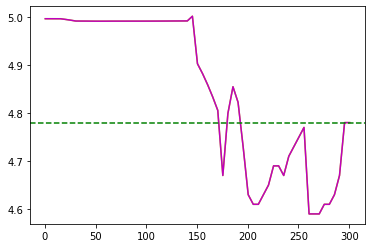

In [21]:
if (center):

    plt.plot(DataSim['time_center'], DataSim['water_level_center'],'y',markersize='4',label='Simulated')
    plt.plot(DataSim21['time_center'],DataSim21['water_level_center'],'m',markersize='4',label='Simulated')

    plt.axhline(y=Z_c,linestyle='--',color='g')


In [ ]:
fig, axs = plt.subplots(1,1, figsize=(8,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
plt.axhline(y=Z_c,linestyle='--',color='g')
i1 =0
x,y=73,0
i2= i1 + 30
print (len(DataSim['time_center']),len(DataSim['water_level_center']),len(DataSim['TD_center']))
print (i1*x,i2*x,DataSim['time_center'][i1*x],DataSim['time_center'][i2*x])
#print (DataSim['thaw_depth_center'][i1*x:i2*x])
plt.plot(DataSim['time_center'][i1*x:i2*x+y],DataSim['thaw_depth_center'][i1*x:i2*x+y],'k',markersize='4',label='Simulated')
plt.plot(DataSim21['time_center'][i1*x:i2*x+y],DataSim21['thaw_depth_center'][i1*x:i2*x+y],'r',markersize='4',label='Simulated')

In [ ]:
#Effect of wetter/drier ice wedge polygon center on ice wedge and polygon trough